# Image similarity search with clustering

In [13]:
import matplotlib.pyplot as plt
from image_classification_simulation.data.office31_loader import Office31Loader
from image_classification_simulation.models.clustering_tools import show_grid_images
from image_classification_simulation.image_search import ImageSimilaritySearch
from image_classification_simulation.utils.visualization_utils import show_grid_images

In [14]:
hparams = {
    "num_workers": 2,
    'batch_size': 32,
    "image_size":224,
    "train_test_split":0.1,
}
office_loader = Office31Loader(data_dir="../examples/data/domain_adaptation_images/amazon/images/", hyper_params=hparams)
office_loader.setup('fit')
train_loader = office_loader.train_dataloader()
val_loader = office_loader.val_dataloader()
test_loader = office_loader.test_dataloader()
# /network/projects/aia/img_classif_sim/vit/output/best_model


In [15]:
hparams = {
        "clustering_alg": "MiniBatchKMeans",
        "loss": "CrossEntropyLoss",
        "batch_size": 124,
        "pretrained": True,
        "num_classes": 31,
        "path_to_model": "../examples/resnet/output/best_model/model.ckpt",
        "architecture": "resnet",
        "num_clusters": 31,
        "random_state": 0,
        "clustering_batch_size": 124,
        "size":256,
        "reassignment_ratio": 0.01,
        "path_cluster_ids": "../debug/dataset_cluster_ids.csv",
    }
image_search = ImageSimilaritySearch(hparams, office_loader)
image_search.setup()

[MiniBatchKMeans] Reassigning 8 cluster centers.
[MiniBatchKMeans] Reassigning 7 cluster centers.
[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 9 cluster centers.
[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 8 cluster centers.
>>> saved cluster ids to file
>>> setup completed successfully!


In [17]:
from sklearn import metrics
import numpy as np
labels_true = np.array(image_search.dataset.class_label.to_list())
labels_pred = image_search.dataset_cluster_ids
# https://scikit-learn.org/stable/modules/clustering.html#rand-score
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.rand_score(labels_true, labels_pred))
mi = metrics.mutual_info_score(labels_true, labels_pred)
print(mi)

0.13950727945794608
0.8925852474424759


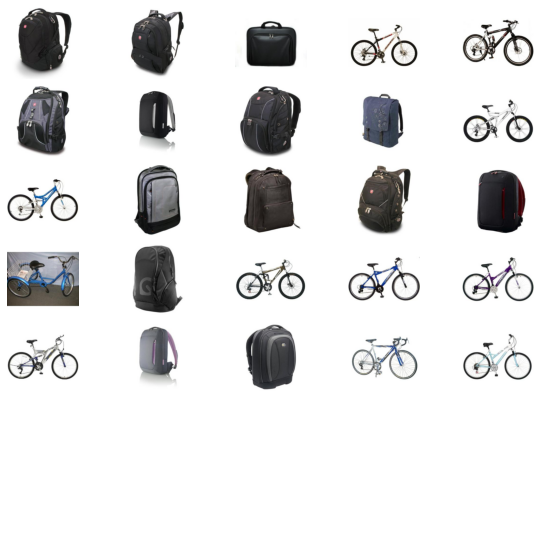

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [23]:
query_res = image_search.find_similar_images("./test_cases/backpack1.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

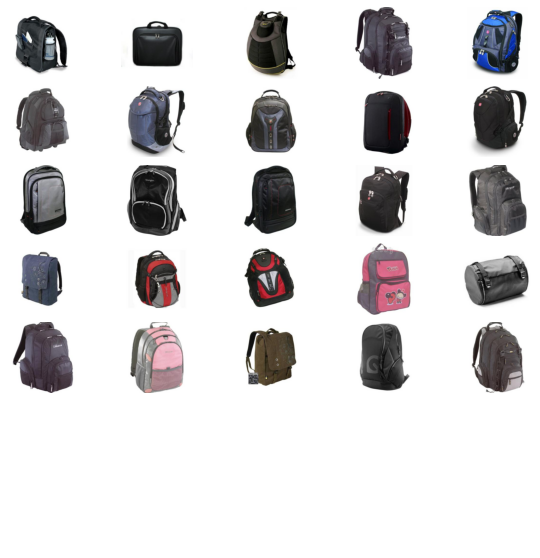

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [24]:
query_res = image_search.find_similar_images("./test_cases/backpack2.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

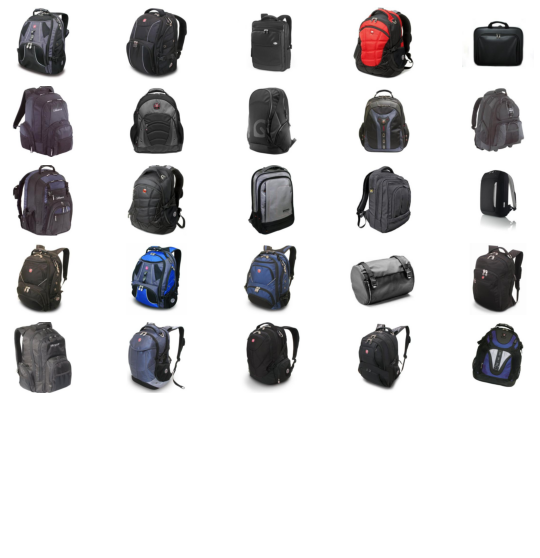

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [25]:
query_res = image_search.find_similar_images("./test_cases/backpack3.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

In [27]:
hparams = {
    "num_workers": 2,
    'batch_size': 32,
    "image_size":224,
    "train_test_split":0.1,
}
office_loader = Office31Loader(data_dir="../examples/data/domain_adaptation_images/amazon/images/", hyper_params=hparams)
office_loader.setup('fit')
train_loader = office_loader.train_dataloader()
val_loader = office_loader.val_dataloader()
test_loader = office_loader.test_dataloader()
# /network/projects/aia/img_classif_sim/vit/output/best_model
hparams = {
        "clustering_alg": "MiniBatchKMeans",
        "loss": "CrossEntropyLoss",
        "pretrained": True,
        "batch_size": 124,
        "num_classes": 31,
        "path_to_model": "/network/projects/aia/img_classif_sim/vit/output/best_model/model.ckpt",
        "architecture": "vit",
        "num_clusters": 31,
        "random_state": 0,
        "clustering_batch_size": 124,
        "reassignment_ratio": 0.05,
        "path_cluster_ids": "../debug/dataset_cluster_ids.csv",
    }
image_search = ImageSimilaritySearch(hparams, office_loader)
image_search.setup()

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of the model checkp

[MiniBatchKMeans] Reassigning 14 cluster centers.
[MiniBatchKMeans] Reassigning 25 cluster centers.
[MiniBatchKMeans] Reassigning 29 cluster centers.
[MiniBatchKMeans] Reassigning 26 cluster centers.
[MiniBatchKMeans] Reassigning 30 cluster centers.
>>> saved cluster ids to file
>>> setup completed successfully!


you may need to run this file as a python script to have results printed to file.

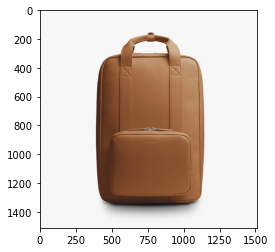

In [31]:
plt.imshow(plt.imread("./test_cases/backpack1.jpeg"))

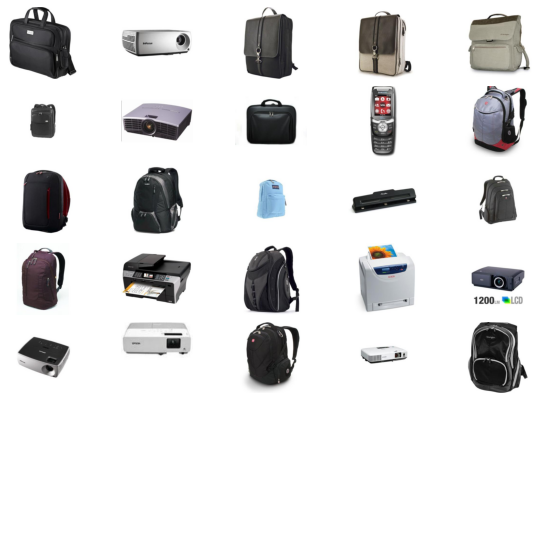

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [28]:
query_res = image_search.find_similar_images("./test_cases/backpack1.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

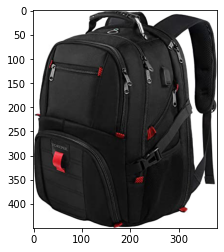

In [30]:
plt.imshow(plt.imread("./test_cases/backpack2.jpeg"))

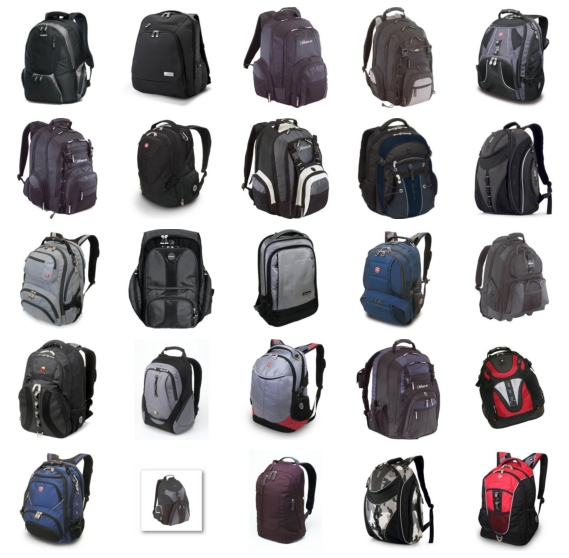

(<Figure size 720x720 with 25 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [29]:
query_res = image_search.find_similar_images("./test_cases/backpack2.jpeg",25)
show_grid_images(query_res['image_path'].tolist())


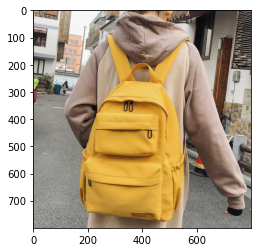

In [32]:
plt.imshow(plt.imread("./test_cases/backpack3.jpeg"))

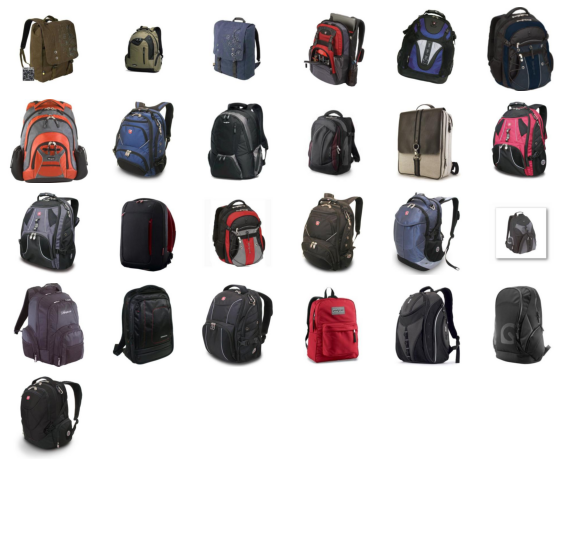

(<Figure size 720x720 with 36 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [33]:
query_res = image_search.find_similar_images("./test_cases/backpack3.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=6,num_cols=6)


In [34]:
from sklearn import metrics
import numpy as np
labels_true = np.array(image_search.dataset.class_label.to_list())
labels_pred = image_search.dataset_cluster_ids
# https://scikit-learn.org/stable/modules/clustering.html#rand-score
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.rand_score(labels_true, labels_pred))
mi = metrics.mutual_info_score(labels_true, labels_pred)
print(mi)

0.00346821584706857
0.14854792937360828
0.23276549865529958


In [35]:
hparams = {
    "num_workers": 2,
    'batch_size': 32,
    "image_size":224,
    "train_test_split":0.1,
}
office_loader = Office31Loader(data_dir="../examples/data/domain_adaptation_images/amazon/images/", hyper_params=hparams)
office_loader.setup('fit')
train_loader = office_loader.train_dataloader()
val_loader = office_loader.val_dataloader()
test_loader = office_loader.test_dataloader()

hparams = {
        "clustering_alg": "MiniBatchKMeans",
        "loss": "CrossEntropyLoss",
        "batch_size": 124,
        "num_channels": 3,
        "pretrained": True,
        "num_classes": 31,
        "img_size": 224,
        "path_to_model": "/network/projects/aia/img_classif_sim/classic_cnn/output/best_model/model.ckpt",
        "architecture": "classic-cnn",
        "num_clusters": 31,
        "random_state": 0,
        "clustering_batch_size": 124,
        "reassignment_ratio": 0.01,
        "path_cluster_ids": "../debug/dataset_cluster_ids.csv",
    }
image_search = ImageSimilaritySearch(hparams, office_loader)
image_search.setup()

[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
[MiniBatchKMeans] Reassigning 3 cluster centers.
>>> saved cluster ids to file
>>> setup completed successfully!


In [36]:
from sklearn import metrics
import numpy as np
labels_true = np.array(image_search.dataset.class_label.to_list())
labels_pred = image_search.dataset_cluster_ids
# https://scikit-learn.org/stable/modules/clustering.html#rand-score
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.rand_score(labels_true, labels_pred))
mi = metrics.mutual_info_score(labels_true, labels_pred)
print(mi)

0.036776273569316405
0.9188707159453965
0.551048233964301


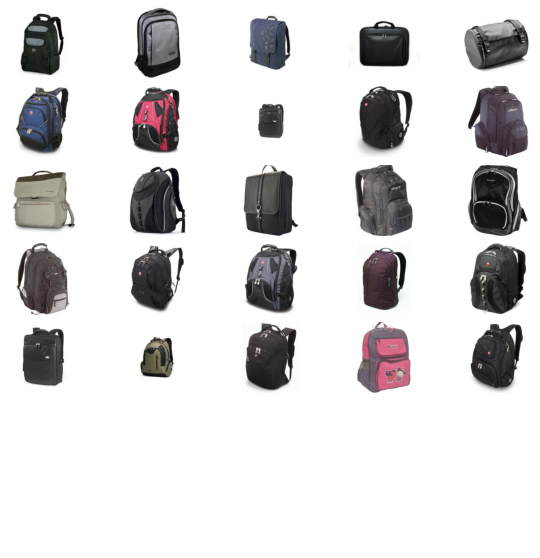

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [4]:
query_res = image_search.find_similar_images("./test_cases/backpack1.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

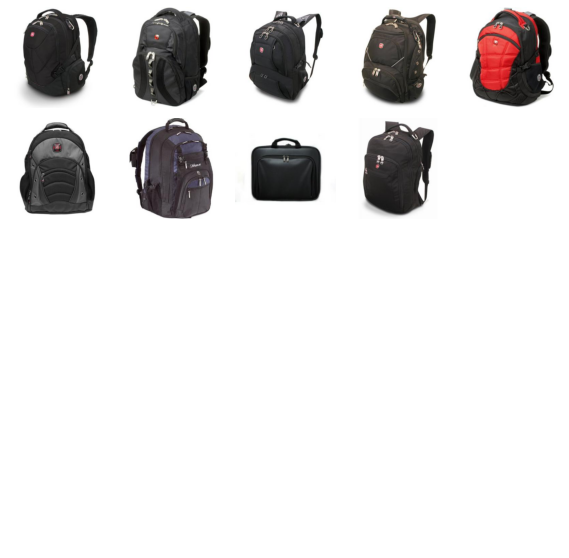

(<Figure size 720x720 with 25 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [5]:
query_res = image_search.find_similar_images("./test_cases/backpack2.jpeg",25)
show_grid_images(query_res['image_path'].tolist())


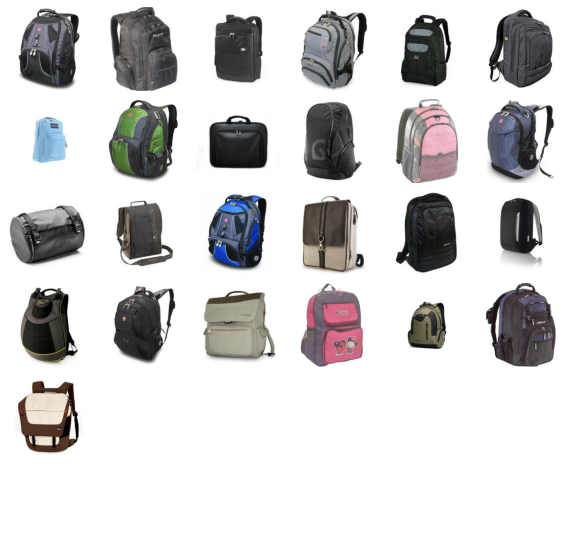

(<Figure size 720x720 with 36 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [6]:
query_res = image_search.find_similar_images("./test_cases/backpack3.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=6,num_cols=6)


In [7]:
image_search.model

ClassicCNN(
  (loss_fn): CrossEntropyLoss()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (activation): ReLU()
  (maxpooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.1, inplace=False)
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(32, e

In [39]:
hparams_ae = {
    "clustering_alg": "MiniBatchKMeans",
    "loss": "CrossEntropyLoss",
    "pretrained": True,
    "batch_size": 100,
    "num_channels": 3,
    "num_classes": 31,
    "path_to_model": "/network/projects/aia/img_classif_sim/conv_ae/output/best_model/model.ckpt",
    "architecture": "conv_ae",
    "num_clusters": 32,
    "random_state": 0,
    "clustering_batch_size": 100,
    "reassignment_ratio": 0.05,
    "path_cluster_ids": "../debug/dataset_cluster_ids.csv"
}
image_search = ImageSimilaritySearch(hparams_ae, office_loader)
image_search.setup()

[MiniBatchKMeans] Reassigning 19 cluster centers.
[MiniBatchKMeans] Reassigning 16 cluster centers.
[MiniBatchKMeans] Reassigning 17 cluster centers.
[MiniBatchKMeans] Reassigning 14 cluster centers.
[MiniBatchKMeans] Reassigning 15 cluster centers.
[MiniBatchKMeans] Reassigning 14 cluster centers.
[MiniBatchKMeans] Reassigning 8 cluster centers.
>>> saved cluster ids to file
>>> setup completed successfully!


In [40]:
from sklearn import metrics
import numpy as np
labels_true = np.array(image_search.dataset.class_label.to_list())
labels_pred = image_search.dataset_cluster_ids
# https://scikit-learn.org/stable/modules/clustering.html#rand-score
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.rand_score(labels_true, labels_pred))
mi = metrics.mutual_info_score(labels_true, labels_pred)
print(mi)

0.0390912778717769
0.9096370050343693
0.5535413276384016


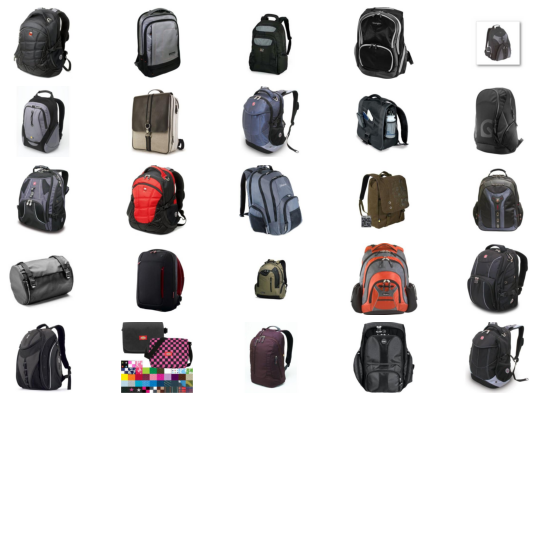

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [41]:
query_res = image_search.find_similar_images("./test_cases/backpack1.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

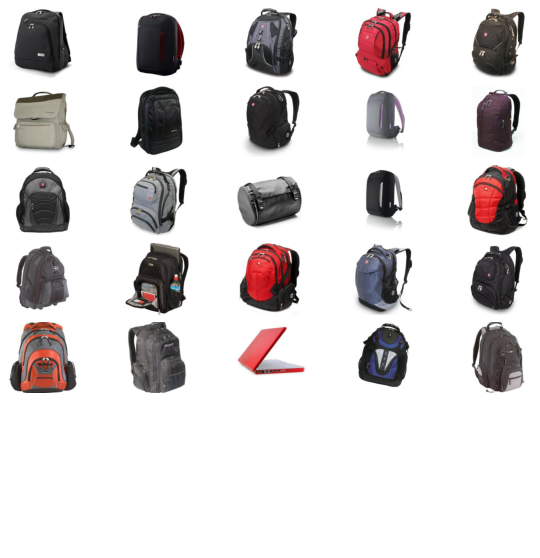

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [42]:
query_res = image_search.find_similar_images("./test_cases/backpack2.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

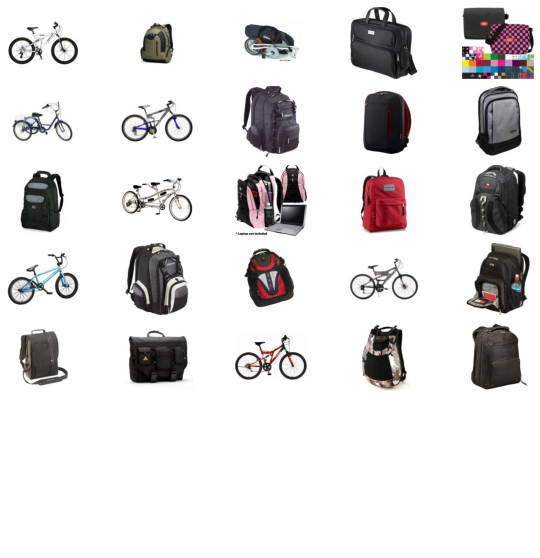

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [43]:
query_res = image_search.find_similar_images("./test_cases/backpack3.jpeg",25)
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)